In [1]:
# Data Manipulation
import pandas as pd
# Natural Language ToolKit - Used To Work With Human Language
import nltk
# Finding The Most Common Words In All The Language
from nltk.corpus import stopwords
# Used To Find Out The Sterm Words
from nltk.stem import PorterStemmer
# Convert Text Into Matrix
from sklearn.feature_extraction.text import CountVectorizer
# Splitting The Data
from sklearn.model_selection import train_test_split
# Used For Classification Problems
from sklearn.naive_bayes import MultinomialNB
# Making Final Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Loading The Data
Data = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
Data.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [4]:
Data.shape

(5572, 5)

In [5]:
# Removing Unnecessary Columns
Data = Data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis="columns")

In [6]:
# After Removing The Unwanted Columns
Data.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [7]:
# Renaming the columns
Data.columns = ["Label", "Message"]

In [8]:
# Printing The Columns Name And The DataFrame
print(Data.columns)
Data.head(2)

Index(['Label', 'Message'], dtype='object')


,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
# Lable Encoding - Changing The Target Value Into 0's And 1's
Data['Label'] = Data['Label'].map({'ham': 0, 'spam': 1, 'promotion': 2})

In [10]:
Data.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
Data["Label"].value_counts()

Label
0    4825
1     747
Name: count, dtype: int64

In [12]:
# Downloading a Dataset For Stopwords - 'Is, Was, Like'.
nltk.download('stopwords')
# Creating An Instance For PorterStemmer Class.
ps = PorterStemmer()
# Gets The List Of Common English Words And Makes It Quick To Check If A Word Is One Of Them.
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# Processing The Text

# Creating A Function That Takes Text As The Input
def preprocess(text):
    # Converting It To Lower Case
    text = text.lower()
    # Splliting The Words In A Sentence
    words = text.split()
    # Checking For The Availability Of That Word In Our Stop_Words Dataset & Making It As A List
    words = [ps.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [14]:
# Processing The Message Column 
Data['Message'] = Data['Message'].apply(preprocess)

In [15]:
Data.head(2)

,Label,Message
0,0,"go jurong point, crazy.. avail bugi n great wo..."
1,0,ok lar... joke wif u oni...


In [16]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Data['Message'])

In [17]:
y = Data['Label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = MultinomialNB()

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<h1 style = "font-weight: 900; color: black;">MultinomialNB</h1>
<p style = "color: black;">Multinomial Naive Bayes (MultinomialNB) is a probabilistic classification algorithm that is commonly used for text classification tasks, such as spam filtering, sentiment analysis, and document categorization.</p>
</div>

In [20]:
model.fit(X_train, y_train)

MultinomialNB()

In [21]:
y_pred = model.predict(X_test)

In [22]:
# Testing A New Sample
def predict_message(text):
    preprocessed_text = preprocess(text)
    text_vector = vectorizer.transform([preprocessed_text])
    prediction = model.predict(text_vector)
    return 'spam' if prediction[0] == 1 else 'ham'
    

<!-- <div style="background-color: #ddefdd; padding: 10px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h1 style="font-size: 24px;">Dataset Descriptions</h1>
</div> -->

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<h1 style = "font-weight: 900; color: black;">HAM MESSAGES</h1>
<ul style = "color: black;">
<li>"Hey, are we still on for dinner tonight at 7 PM?"</li>
<li>"Don't forget to bring your notebook to the meeting tomorrow."</li>
<li>"Can you send me the report by the end of the day?"</li>
<li>"Happy birthday! Hope you have a wonderful day!"</li>
<li>"I'll pick up some groceries on my way home."</li>
<li>"The meeting has been rescheduled to 3 PM."</li>
<li>"Looking forward to our weekend trip!"</li>
<li>"Please review the attached document and get back to me."</li>
<li>"Thanks for your help with the project."</li>
<li>"Let’s catch up over coffee sometime next week."</li>
</ul>
</div>


<!-- <div style="background-color: #ddefdd; padding: 10px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
<h1 style="font-size: 24px;">Dataset Descriptions</h1>
</div> -->

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<h1 style = "font-weight: 900; color: black;">SPAM MESSAGES</h1>
<ul style = "color: black;">
<li>"Congratulations! You've won a free ticket to the Bahamas. Call now!"</li>
<li>"URGENT: Your account has been compromised. Please click this link to verify your identity."</li>
<li>"You have been selected for a $5000 prize. Claim it now!"</li>
<li>"Get a brand new iPhone for just $1. Limited time offer!"</li>
<li>"Your PayPal account has been suspended. Click here to resolve the issue."</li>
<li>"You are pre-approved for a loan of up to $50,000. Apply now!"</li>
<li>"Free membership for the first 100 sign-ups. Don't miss out!"</li>
<li>"Exclusive deal! Buy one, get one free on all items. Shop now!"</li>
<li>"Urgent! Your car warranty is about to expire. Renew now!"</li>
<li>"Lose 20 pounds in just 2 weeks with this new diet pill. Order today!"</li>
</ul>
</div>


In [23]:
new_message = "Urgent! Your car warranty is about to expire. Renew now!"
prediction = predict_message(new_message)
print(f"The message is: {prediction}")

The message is: spam


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Display classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.979372197309417
Confusion Matrix:
[[954  11]
 [ 12 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.92      0.92       150

    accuracy                           0.98      1115
   macro avg       0.96      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



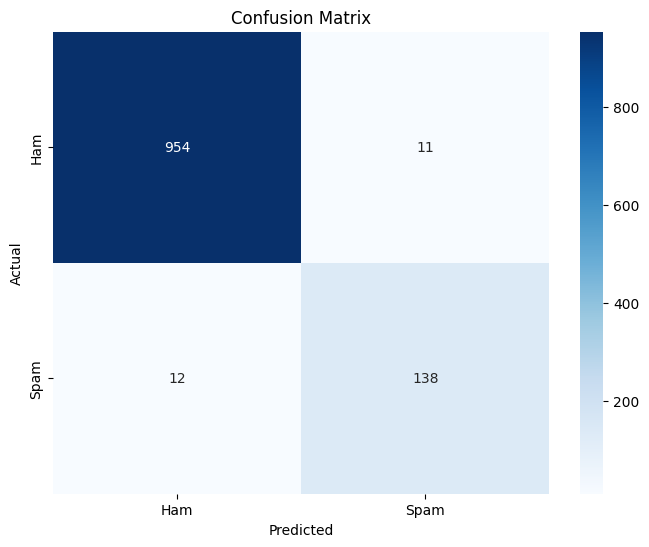

In [25]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()